In [1]:
!pip install ydata-synthetic --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 21.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which 

## Tabular Synthetic Data Generation with Gaussian Mixture and CTGAN

This notebook is an example of how to use a synthetic data generation methods based on GMM to generate synthetic tabular data with numeric and categorical features.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ks_2samp
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer

In [10]:
df = pd.read_csv("credit_card_default.csv")

In [11]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
cat_cols = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "default.payment.next.month"]
num_cols = ["ID", "LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

In [15]:
df.shape[1]

25

In [16]:
len(cat_cols) + len(num_cols)

25

## Gaussian Mixture - the Fast Approach

In [17]:
%%time
synth = RegularSynthesizer(modelname='fast')
synth.fit(data=df, num_cols=num_cols, cat_cols=cat_cols)

Hyperparameter search: 100%|██████████| 8/8 [09:57<00:00, 74.63s/it] 


CPU times: user 12min 41s, sys: 3min 27s, total: 16min 8s
Wall time: 9min 58s


### Generate new synthetic data

In [18]:
synth_data = synth.sample(30000)
synth_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,17402,276075.372207,1,2,2,30,2,2,2,2,...,18164.926548,11717.982890,-4742.624357,10590.000257,28802.191856,19550.218509,8487.435200,4686.725430,22520.887187,1
1,6598,183442.746984,2,2,2,28,2,2,2,0,...,49402.254575,58802.483393,69970.636217,-5471.969884,-9808.207827,3637.635458,4698.166689,-9647.480792,-10016.564353,0
2,15185,147046.092195,1,2,1,35,0,0,0,0,...,73644.082292,68128.529511,69319.572232,-22524.627923,13531.474481,-3386.049729,-4531.024935,-1003.423241,3044.034230,0
3,11376,205242.019570,2,2,1,49,0,-1,2,2,...,-7265.967162,15151.052523,1355.778728,11533.352084,9142.166099,3918.781121,-1323.558357,-4547.783182,-1389.498548,0
4,18782,144678.175292,2,1,1,48,0,2,0,0,...,31803.714634,-3098.020695,1783.991533,-10836.891435,-8165.008025,-13256.477209,-8529.594520,12455.550659,-4120.327312,0
5,38457,97374.456223,2,2,2,6,0,0,0,0,...,25128.062305,40216.728813,77993.449255,-9256.620680,-17964.767888,-23454.774001,12875.118669,22018.821246,12708.071073,0
6,-318,-79294.313285,2,2,2,47,0,0,0,2,...,-34643.386114,-14248.080648,4249.541413,-24242.032645,-5881.003233,-422.631981,-12727.589634,-1351.982941,-10402.417247,0
7,19173,-12175.142931,2,3,2,23,0,0,0,0,...,67765.732220,70023.377649,89101.743442,5154.497127,8689.769079,6825.402860,21434.989854,14966.603312,-20361.288140,0
8,21979,307605.688882,1,2,2,42,0,0,0,2,...,117297.107746,117231.220236,145780.815780,-4016.715892,16100.336597,4913.362542,9843.437570,6873.767240,16889.303020,0
9,12044,21274.672091,2,2,1,39,0,0,0,0,...,25650.935662,39605.238571,14548.979413,11760.316845,-3061.769594,-4579.367307,11992.278842,46.956242,37364.699022,0


In [19]:
synth_data.to_csv('synth_data_fast.csv', index=False)

# Tabular Synthetic Data Generation with CTGAN

### Define model and training parameters

In [23]:
# Defining the training parameters
batch_size = 500
epochs = 5+1
learning_rate = 2e-4
beta_1 = 0.5
beta_2 = 0.9

ctgan_args = ModelParameters(batch_size=batch_size,
                             lr=learning_rate,
                             betas=(beta_1, beta_2))

train_args = TrainParameters(epochs=epochs)

### Create and Train the CTGAN

In [24]:
%%time
synth_full = RegularSynthesizer(modelname='ctgan', model_parameters=ctgan_args)
synth_full.fit(data=df, train_arguments=train_args, num_cols=num_cols, cat_cols=cat_cols)

Epoch: 0 | critic_loss: 0.21835128962993622 | generator_loss: 0.904442548751831
Epoch: 1 | critic_loss: 0.2478346824645996 | generator_loss: 0.4894404411315918
Epoch: 2 | critic_loss: 0.31676924228668213 | generator_loss: 0.1739262342453003
Epoch: 3 | critic_loss: 0.0295867919921875 | generator_loss: 0.14163577556610107
Epoch: 4 | critic_loss: 0.011317640542984009 | generator_loss: -0.5651478171348572
Epoch: 5 | critic_loss: 0.03170735388994217 | generator_loss: -0.9206501245498657
CPU times: user 6min 19s, sys: 54.9 s, total: 7min 14s
Wall time: 6min 11s


### Generate new synthetic data

In [25]:
synth_full_data = synth_full.sample(30000)
synth_full_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,23455,368375.356722,2,2,1,27,0,2,0,3,...,-391.546504,77389.494726,3959.959747,1091.635327,-370.221074,385.514441,875.523251,440.659174,2942.907069,1
1,28331,45366.600856,2,2,2,26,-2,2,-2,0,...,74383.326044,83.946950,5869.366415,1267.533096,-1208.637649,682.838364,3442.207848,678.418948,935.891502,0
2,15013,25573.483465,1,0,2,32,3,-1,2,4,...,-841.190383,68439.104860,2585.610880,12110.621224,6146.889584,2510.599789,1210.140063,3481.333269,-1399.997860,0
3,5666,61223.812462,1,2,1,25,-1,2,-1,8,...,78905.459685,71750.559821,2882.463174,-1978.594789,-2161.128150,569.565846,-424.154060,300.441003,-1048.588420,1
4,7119,8225.557098,1,1,1,32,0,-1,-2,0,...,19480.841318,70578.049693,165854.246124,-1462.926998,-177.508132,-585.664530,804.843093,95.234257,-311.995413,1
5,1079,282887.032566,2,2,1,59,-1,4,-1,0,...,9037.389163,75804.006836,3699.825818,3630.249023,5833.007571,5065.959551,-2107.882232,2303.666995,-327.093522,1
6,13115,48451.172800,1,2,2,26,-2,5,-1,5,...,28774.339771,73487.200301,117003.599686,1655.034370,-871.415699,10213.437543,3826.800831,440.816179,717.951993,0
7,-1482,173214.533115,2,1,2,42,2,0,-1,-1,...,-83580.059543,49667.490111,16762.700877,-688.150146,-42.557386,10011.375645,11774.410136,2659.821822,610.209443,0
8,14623,250024.113165,1,1,2,27,2,0,2,2,...,1213.842868,5178.152788,-5938.680912,21123.430014,470.256699,130.247003,2670.965033,-473.559915,3560.806729,1
9,8648,18772.070184,1,1,2,48,3,0,0,4,...,-1715.189060,46472.247198,98577.140671,4454.246219,-494.795955,3125.916129,1104.547084,-277.096767,289.021427,0


In [26]:
synth_full_data.to_csv('synth_data_full.csv', index=False)

## Compare original data to synthetic datasets

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [28]:
synth_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15050.414367,8683.679754,-16356.000000,9248.000000,15006.000000,20863.000000,50493.000000
LIMIT_BAL,30000.0,167030.676754,129382.588255,-368293.792911,80193.166688,166273.013769,253664.910262,697018.965221
SEX,30000.0,1.588033,0.492197,1.000000,1.000000,2.000000,2.000000,2.000000
EDUCATION,30000.0,1.794867,0.700193,1.000000,1.000000,2.000000,2.000000,5.000000
MARRIAGE,30000.0,1.531100,0.499174,0.000000,1.000000,2.000000,2.000000,3.000000
AGE,30000.0,35.024900,9.168218,-1.000000,29.000000,35.000000,41.000000,69.000000
PAY_0,30000.0,-0.123300,1.017938,-2.000000,-1.000000,0.000000,0.000000,4.000000
PAY_2,30000.0,-0.195867,1.147786,-2.000000,-1.000000,0.000000,0.000000,4.000000
PAY_3,30000.0,-0.228833,1.145475,-2.000000,-1.000000,0.000000,0.000000,7.000000
PAY_4,30000.0,-0.270533,1.065637,-2.000000,-1.000000,0.000000,0.000000,7.000000


In [29]:
synth_full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,14514.667467,9201.374991,-2483.000000,7235.000000,14728.500000,22304.500000,32340.000000
LIMIT_BAL,30000.0,92807.632842,119563.014196,-36445.908335,10935.232452,34619.596277,144252.236191,935756.607251
SEX,30000.0,1.458067,0.498247,1.000000,1.000000,1.000000,2.000000,2.000000
EDUCATION,30000.0,1.962867,0.886405,0.000000,1.000000,2.000000,2.000000,6.000000
MARRIAGE,30000.0,1.513533,0.557818,0.000000,1.000000,2.000000,2.000000,3.000000
AGE,30000.0,34.361933,9.622426,18.000000,27.000000,32.000000,40.000000,83.000000
PAY_0,30000.0,0.680900,2.007256,-2.000000,0.000000,0.000000,2.000000,8.000000
PAY_2,30000.0,0.535133,2.026451,-2.000000,-1.000000,0.000000,2.000000,8.000000
PAY_3,30000.0,0.417800,2.046033,-2.000000,-1.000000,0.000000,0.000000,8.000000
PAY_4,30000.0,0.588267,2.207435,-2.000000,-1.000000,0.000000,2.000000,8.000000


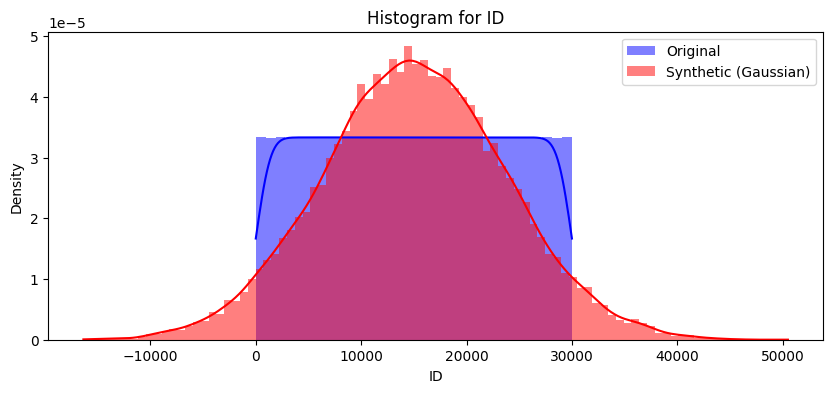

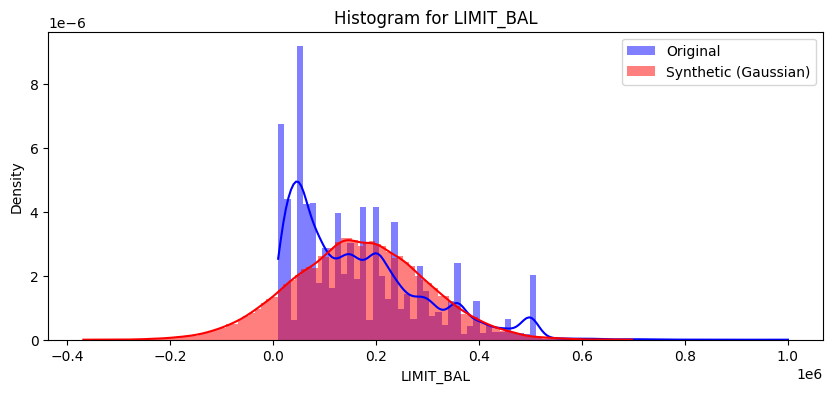

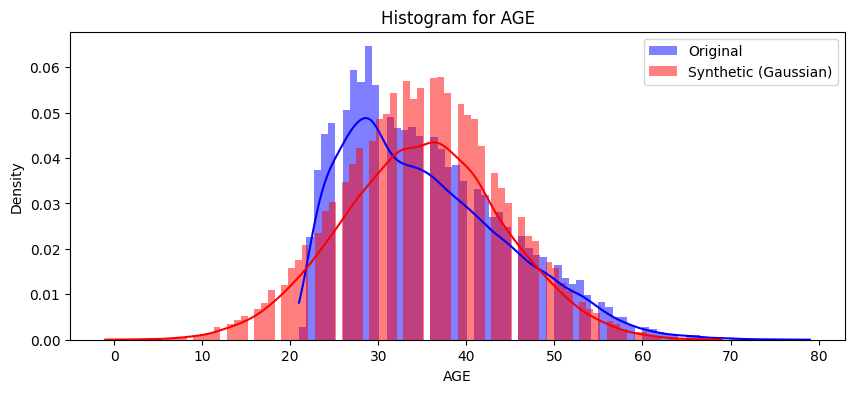

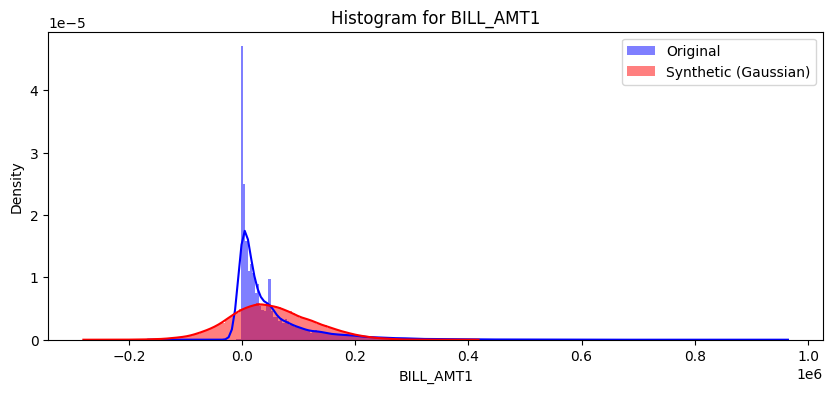

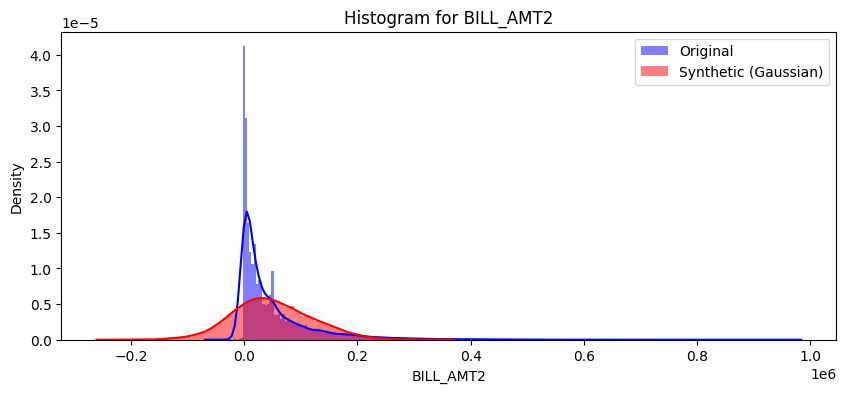

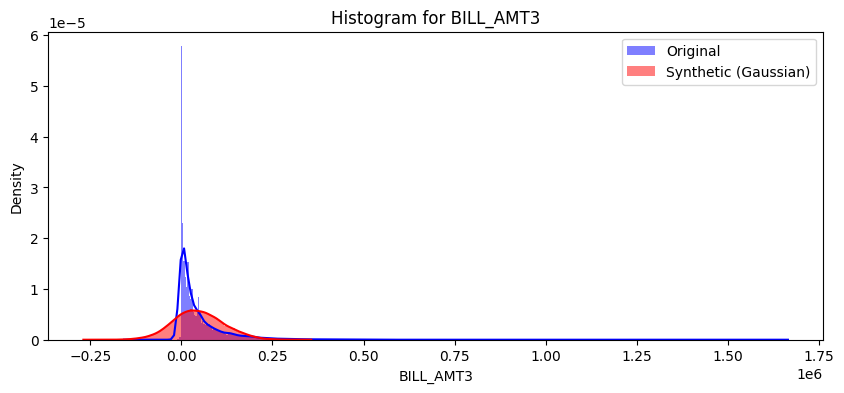

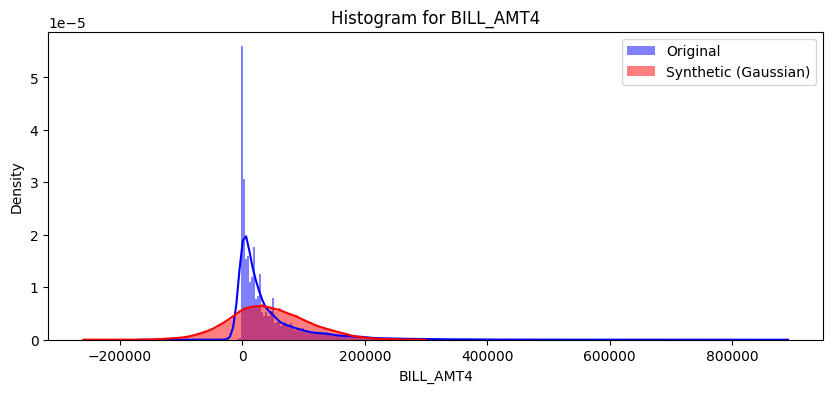

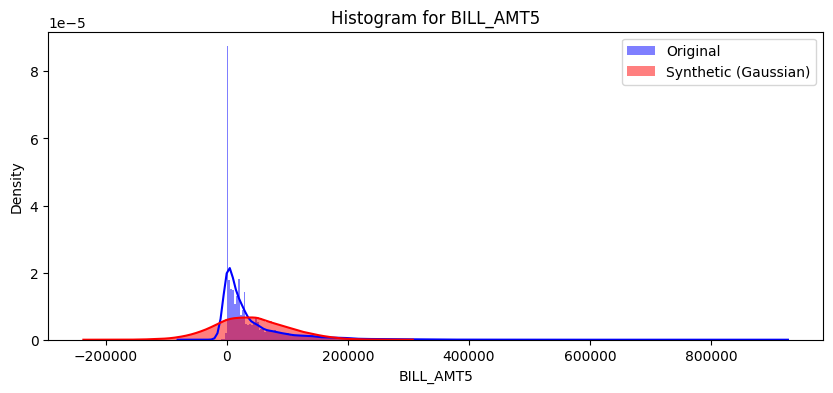

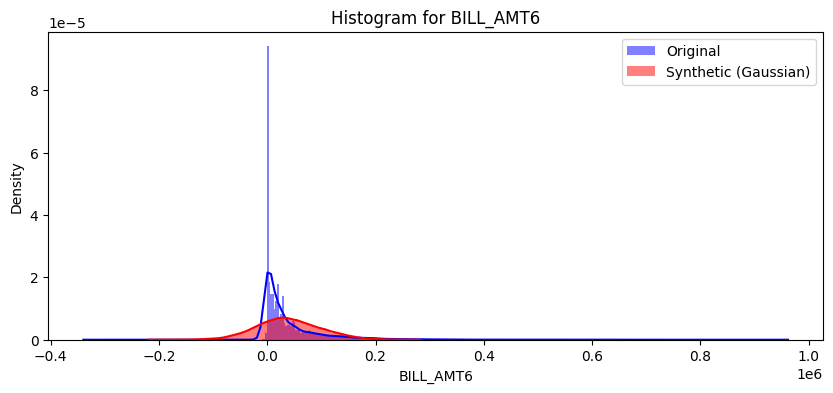

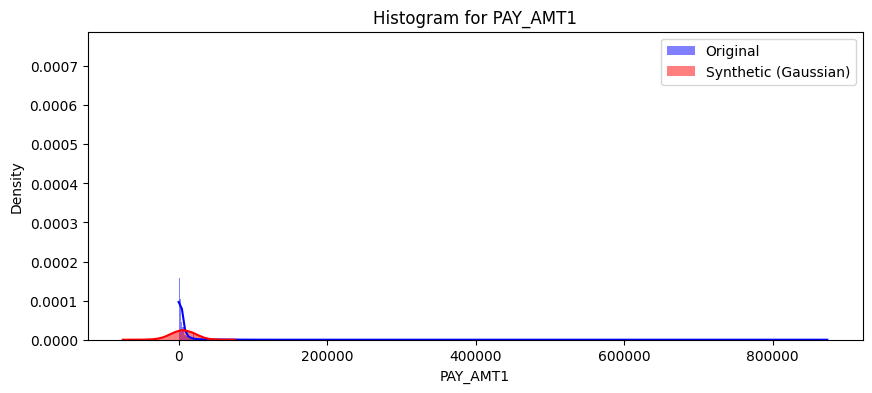

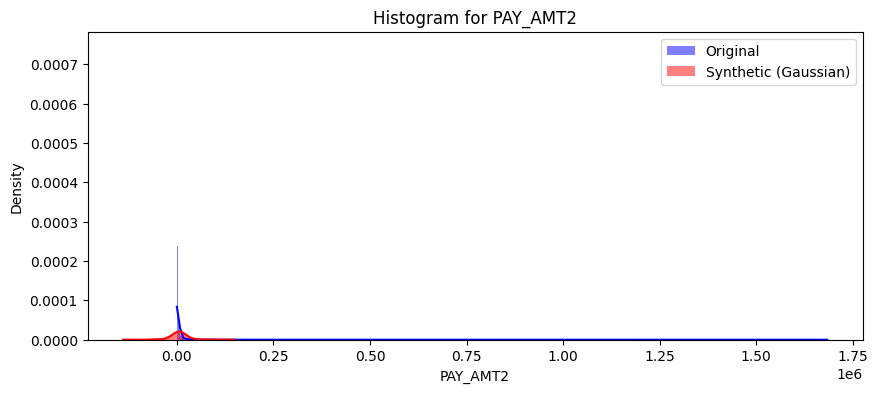

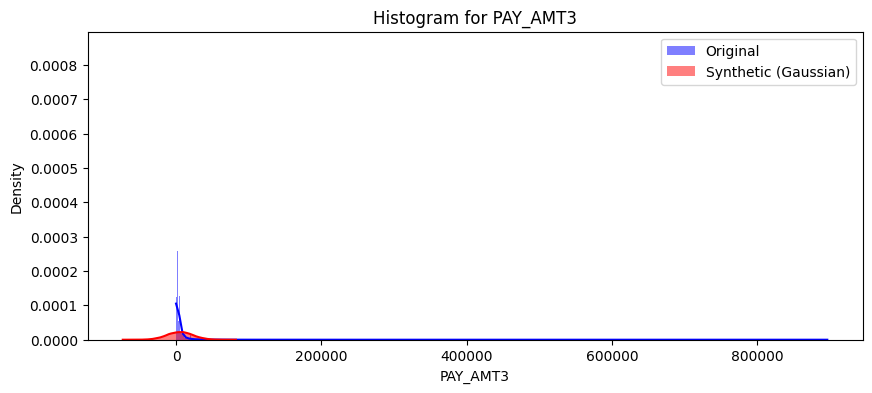

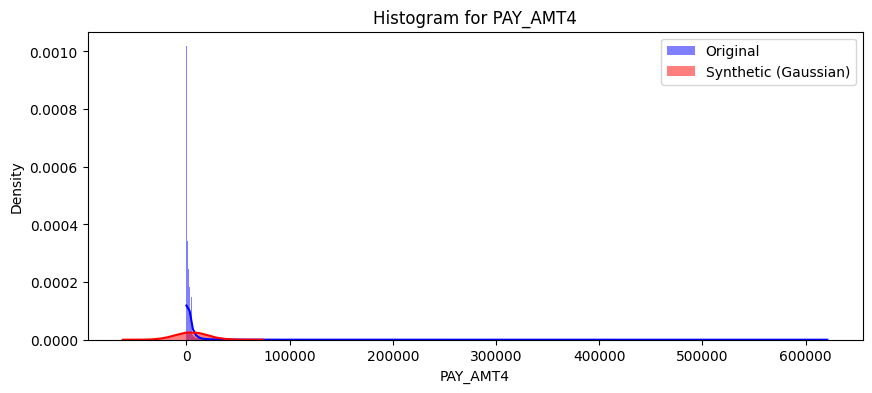

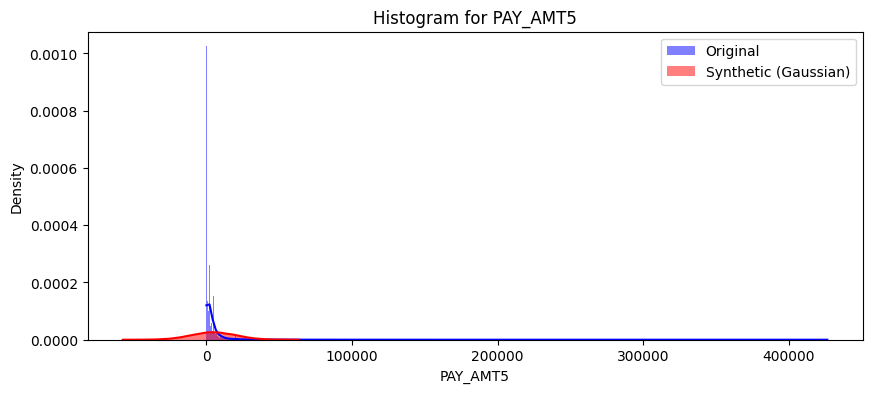

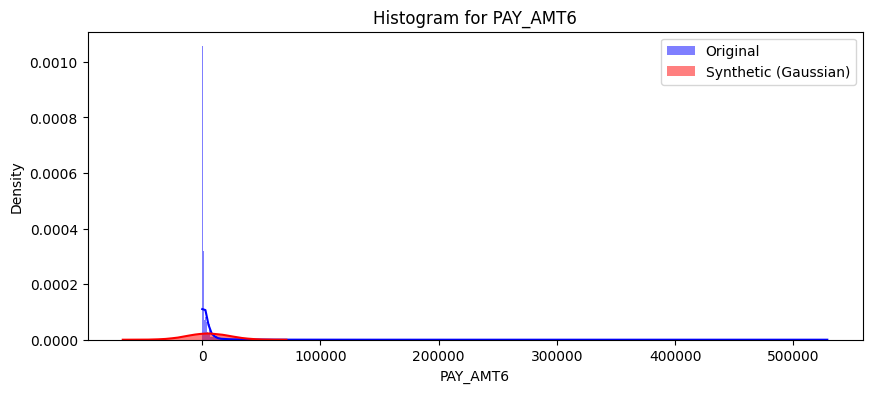

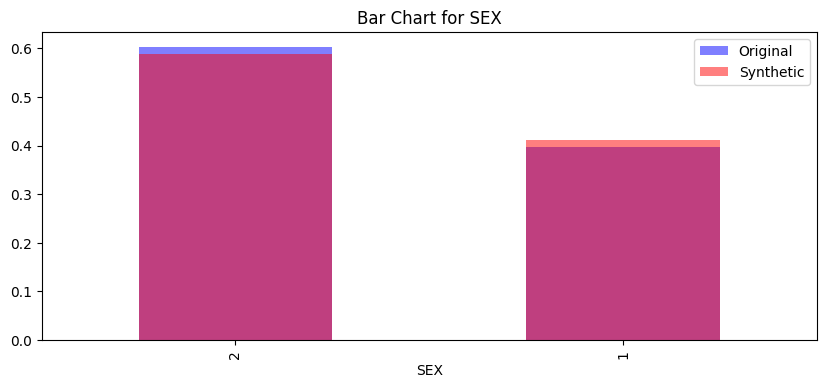

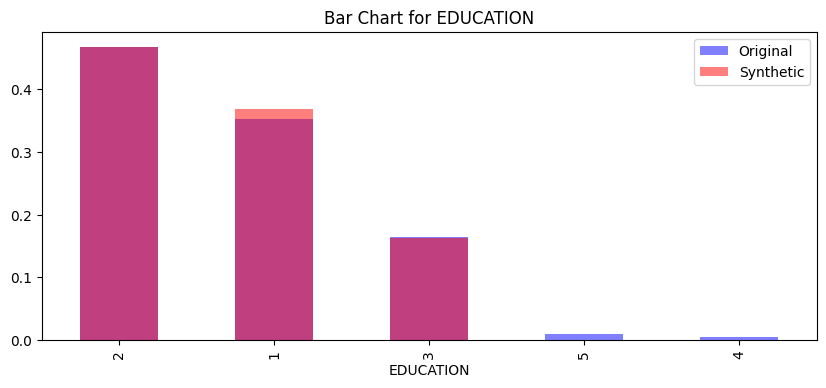

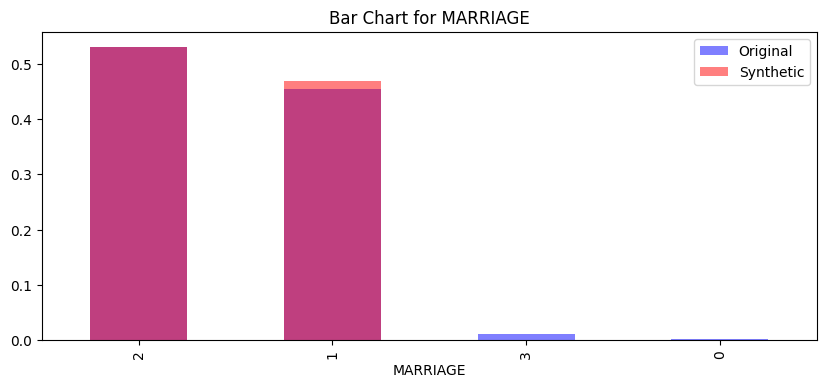

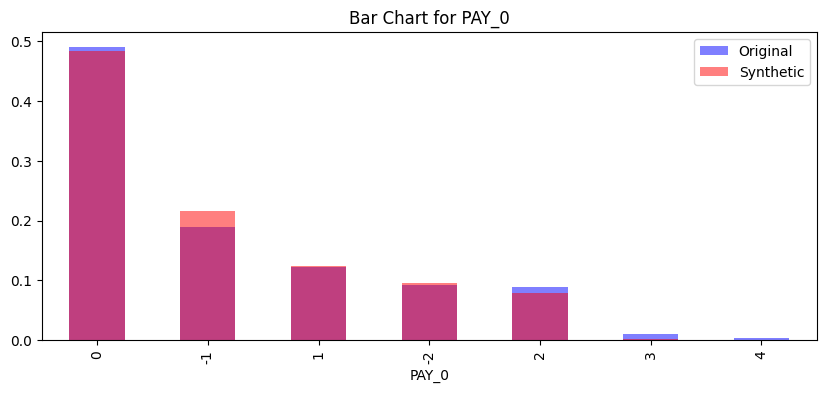

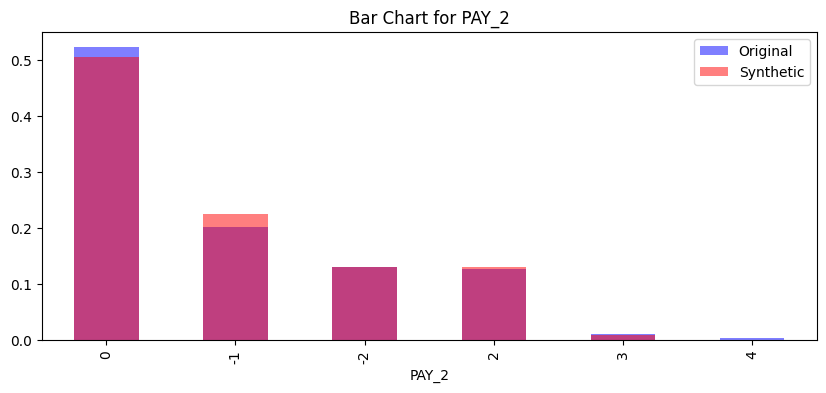

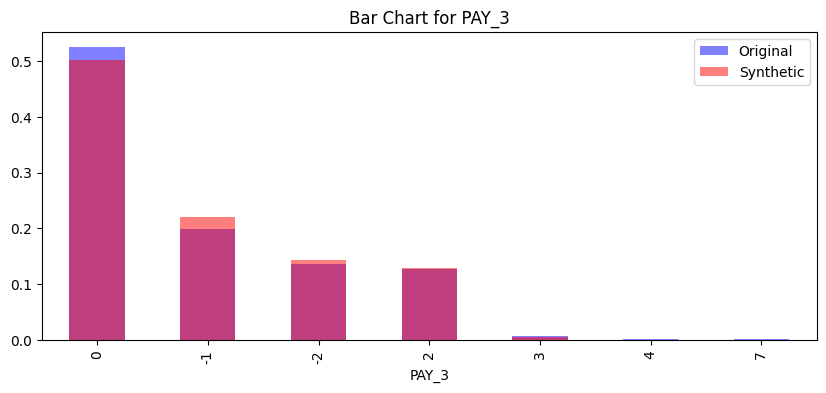

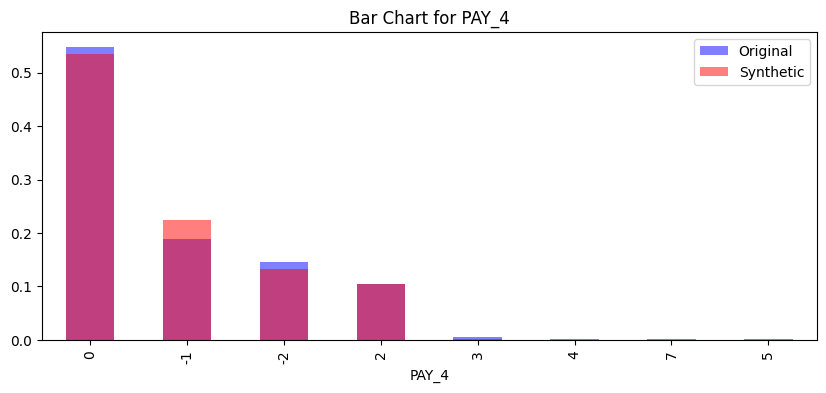

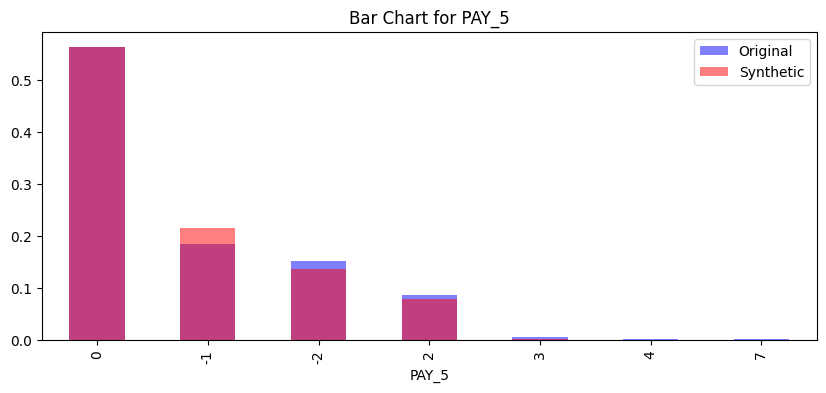

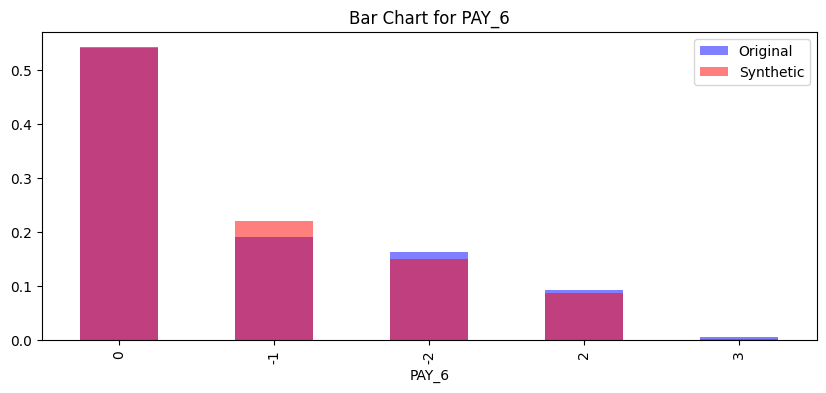

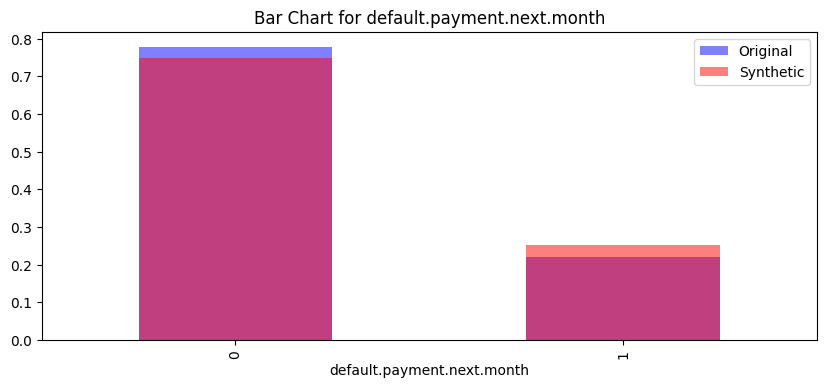

In [31]:
# Plotting histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], color="blue", label='Original', kde=True, stat="density", linewidth=0)
    sns.histplot(synth_data[col], color="red", label='Synthetic (Gaussian)', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram for {col}')
    plt.legend()
    plt.show()

# Plotting bar charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, label='Original')
    synth_data[col].value_counts(normalize=True).plot(kind='bar', color='red', alpha=0.5, label='Synthetic')
    plt.title(f'Bar Chart for {col}')
    plt.legend()
    plt.show()

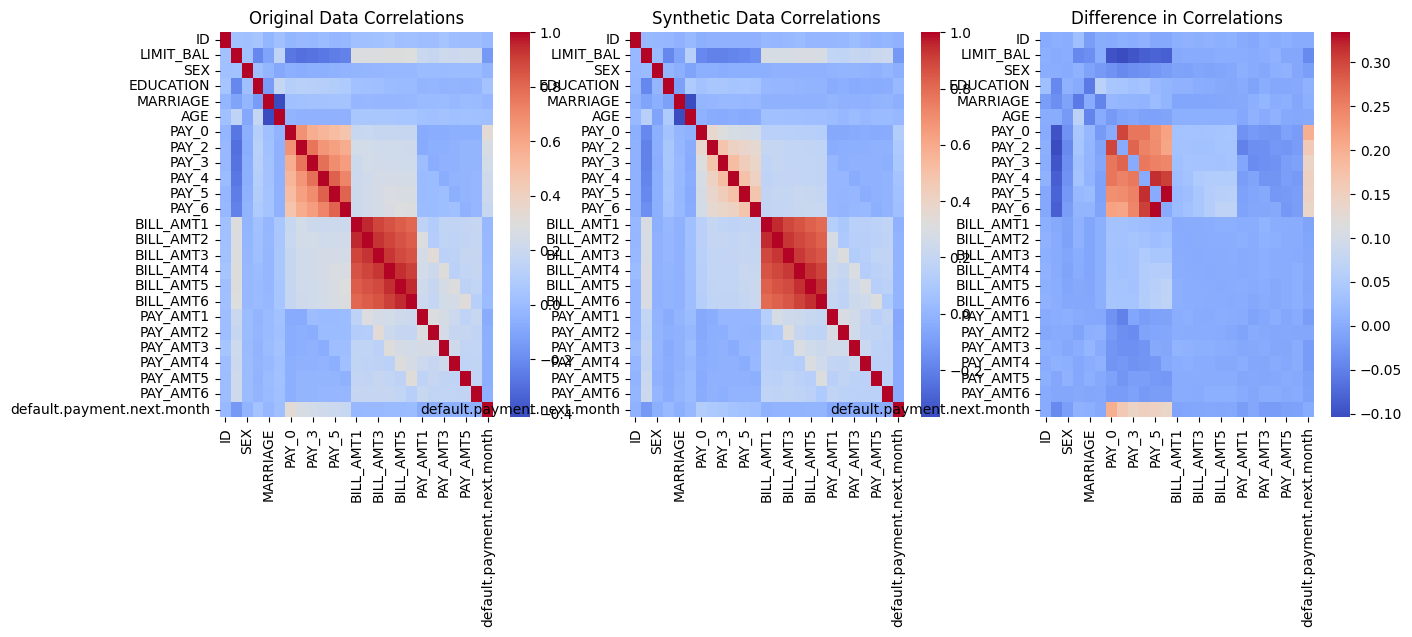

In [32]:
# Calculate correlation matrices
corr_original = df.corr()
corr_synthetic = synth_data.corr()

# Create a difference matrix
corr_diff = corr_original - corr_synthetic

# Plot the correlation matrices for visual comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(corr_original, annot=False, cmap='coolwarm')
plt.title('Original Data Correlations')

plt.subplot(1, 3, 2)
sns.heatmap(corr_synthetic, annot=False, cmap='coolwarm')
plt.title('Synthetic Data Correlations')

plt.subplot(1, 3, 3)
sns.heatmap(corr_diff, annot=False, cmap='coolwarm')
plt.title('Difference in Correlations')

plt.show()

In [42]:
ks_results = {}

for col in num_cols:
    # Perform the KS test for each numerical column
    ks_stat, p_value = ks_2samp(df[col], synth_data[col])
    ks_results[col] = {'KS Statistic': ks_stat, 'p-value': p_value}

# Convert results to a DataFrame for easier viewing
ks_results_df = pd.DataFrame(ks_results).T

print(ks_results_df)

           KS Statistic        p-value
ID             0.061667   4.967903e-50
LIMIT_BAL      0.116600  3.948090e-178
AGE            0.068800   3.513626e-62
BILL_AMT1      0.237633   0.000000e+00
BILL_AMT2      0.237167   0.000000e+00
BILL_AMT3      0.243100   0.000000e+00
BILL_AMT4      0.240533   0.000000e+00
BILL_AMT5      0.243167   0.000000e+00
BILL_AMT6      0.243333   0.000000e+00
PAY_AMT1       0.357533   0.000000e+00
PAY_AMT2       0.378800   0.000000e+00
PAY_AMT3       0.382233   0.000000e+00
PAY_AMT4       0.380067   0.000000e+00
PAY_AMT5       0.374600   0.000000e+00
PAY_AMT6       0.389233   0.000000e+00


In [43]:
ks_results_df["KS Statistic"].mean()

0.2636311111111111

## Visualise CTGAN charts

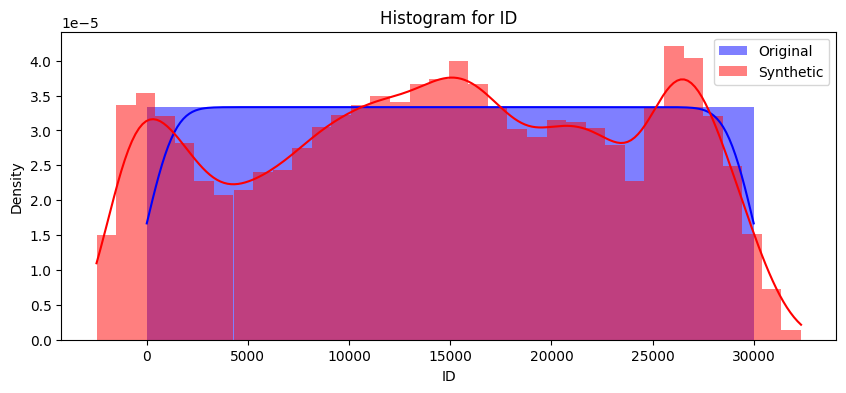

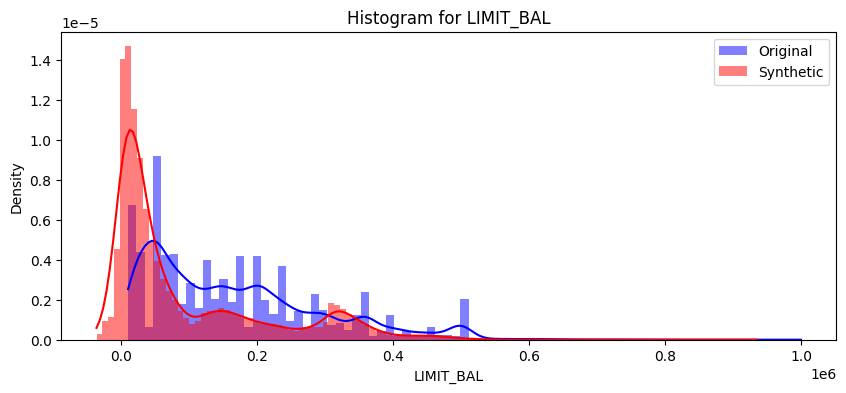

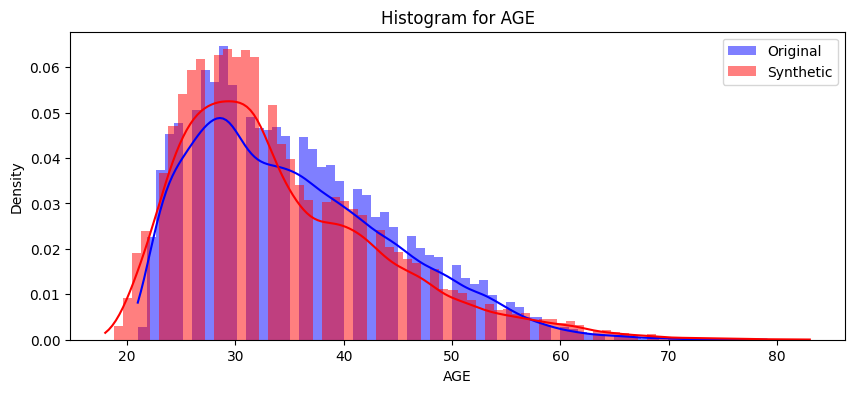

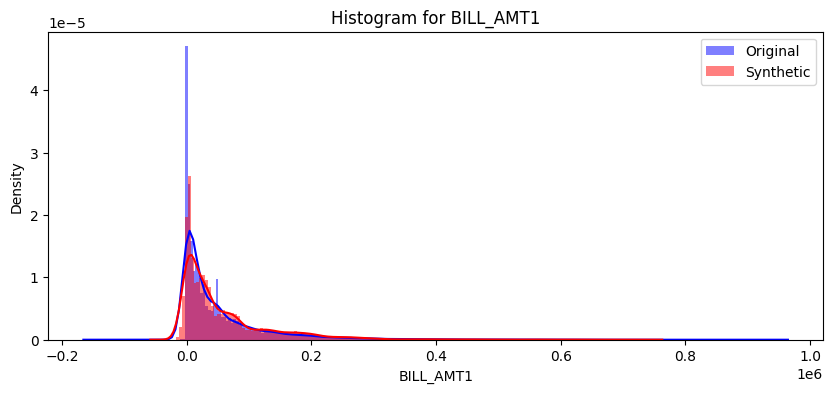

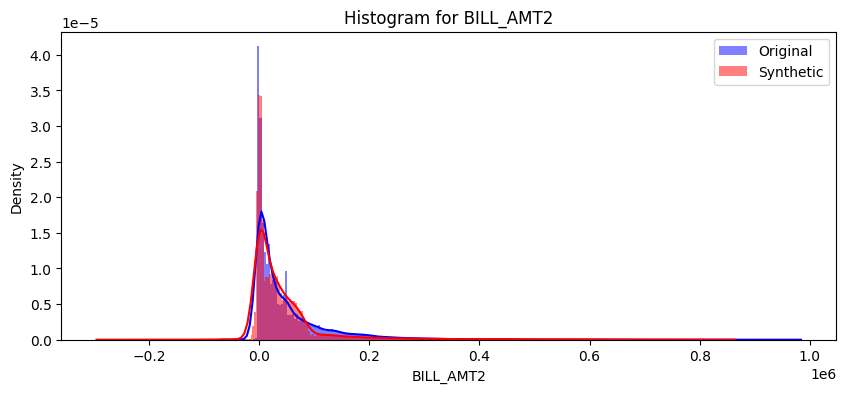

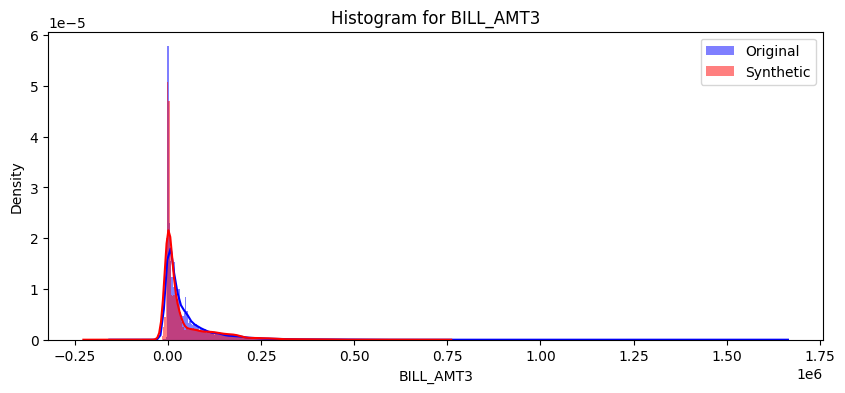

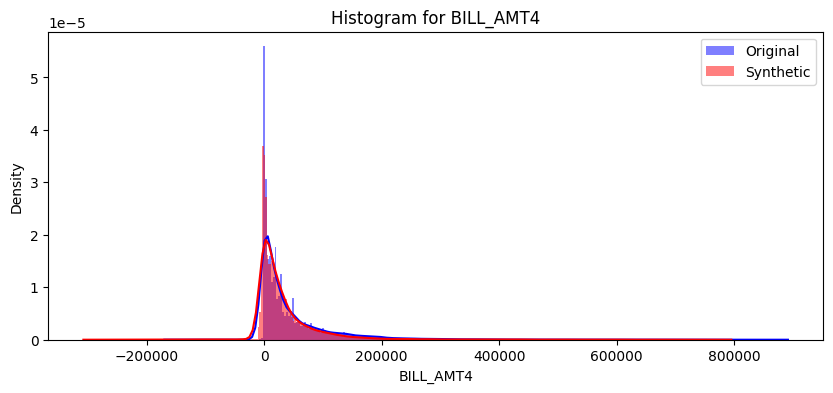

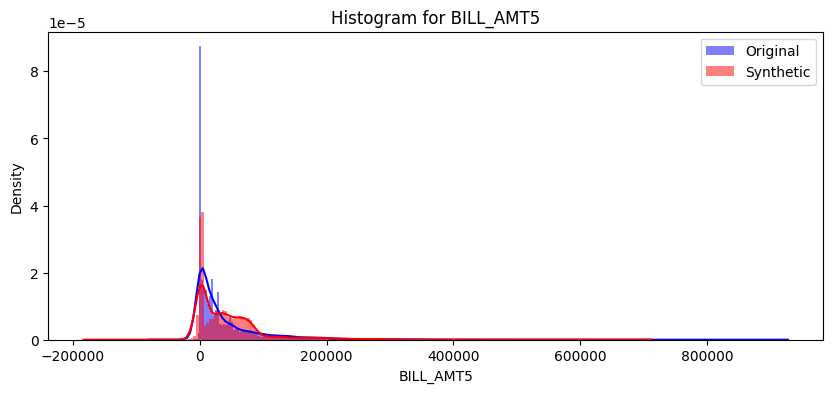

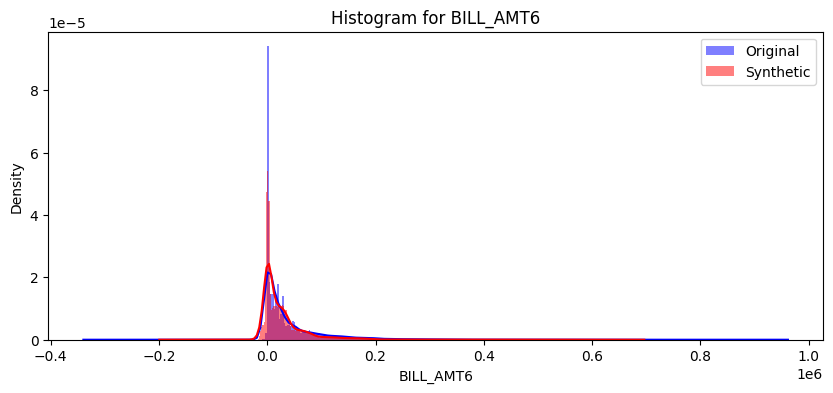

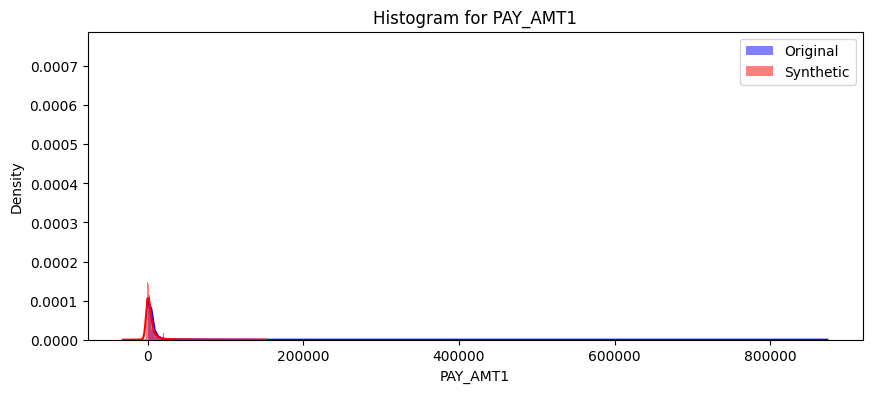

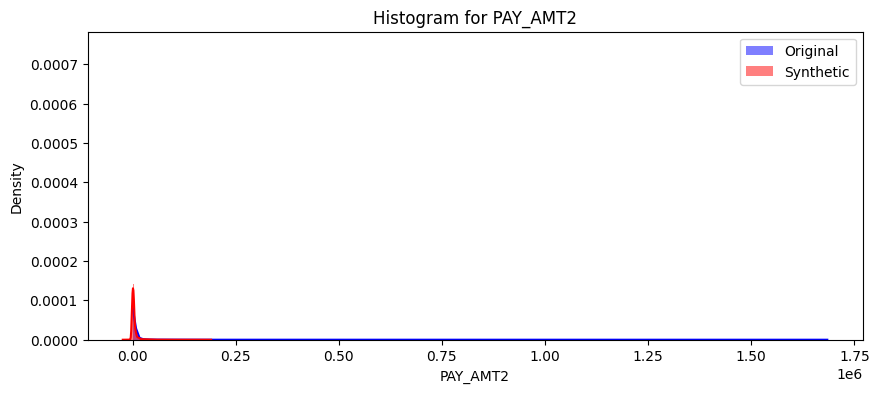

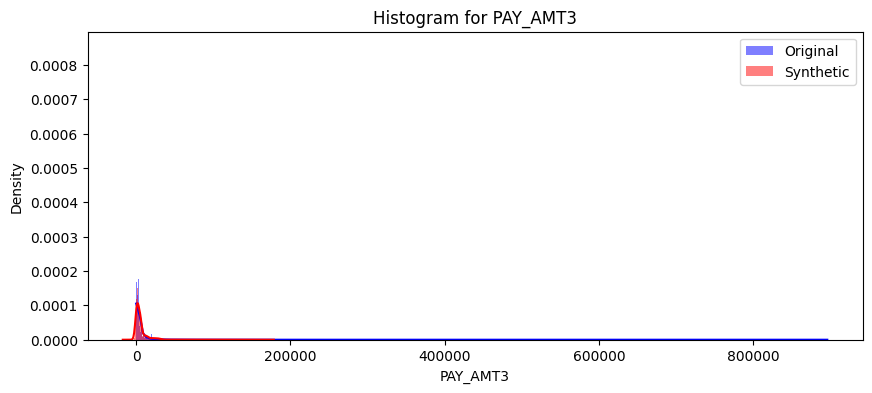

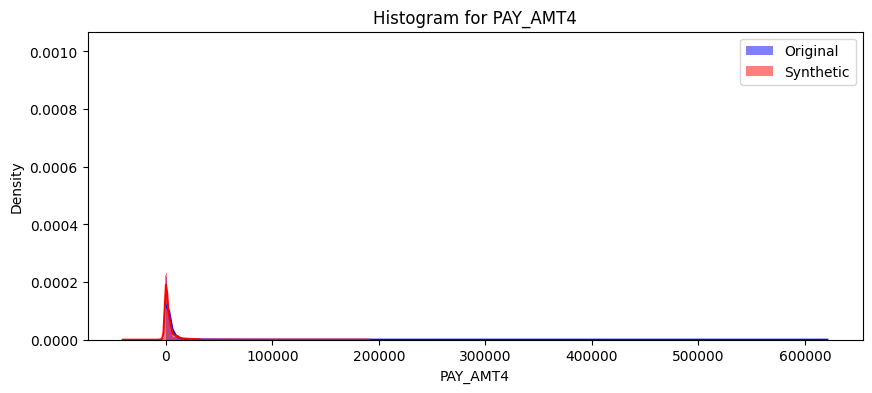

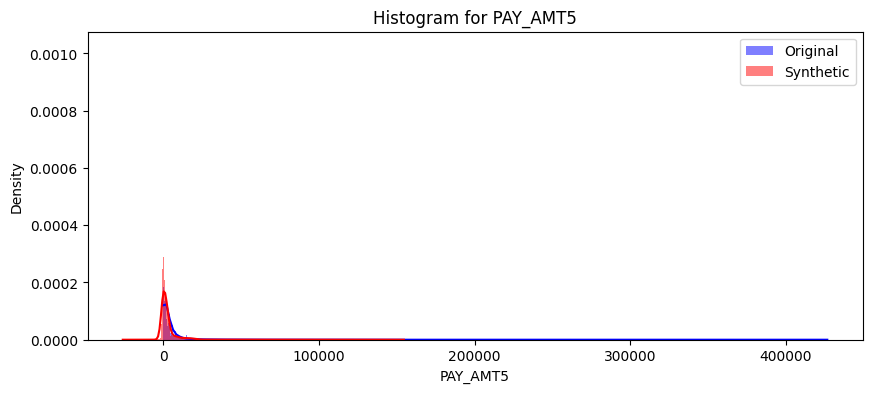

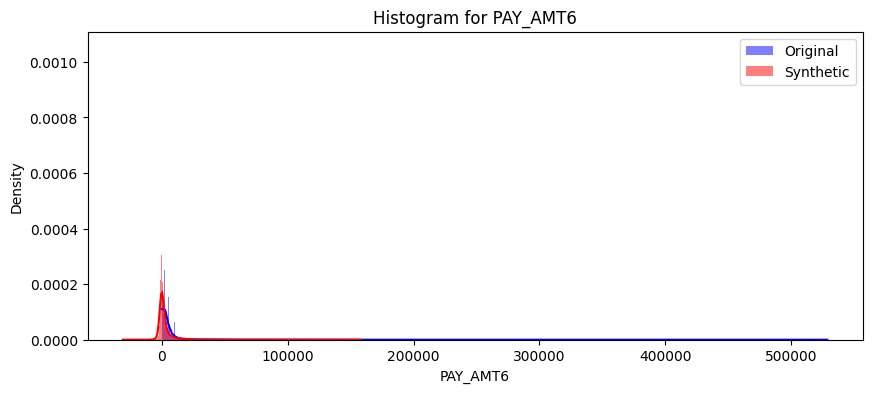

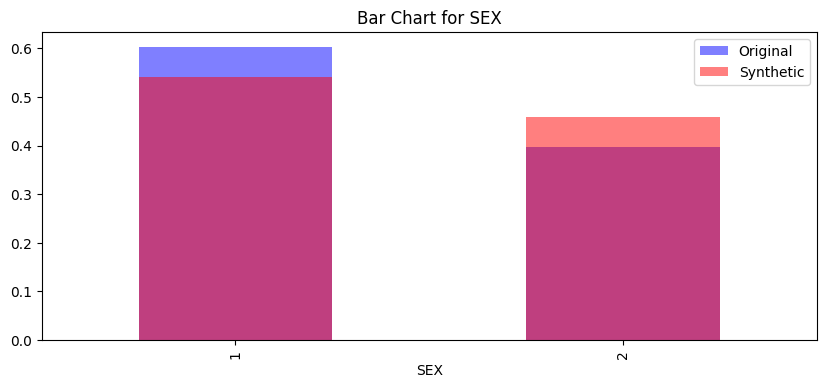

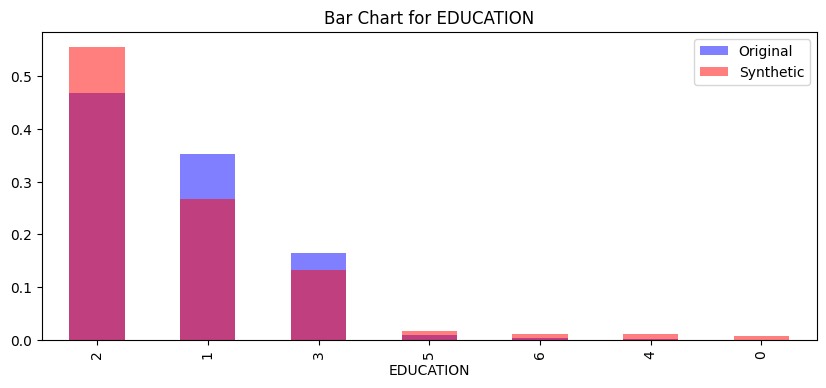

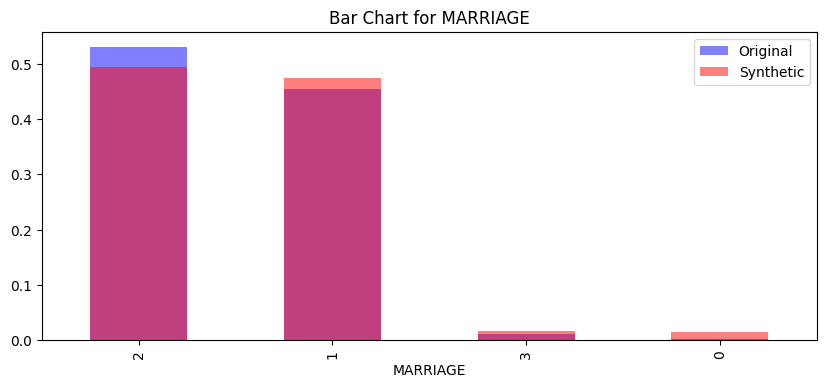

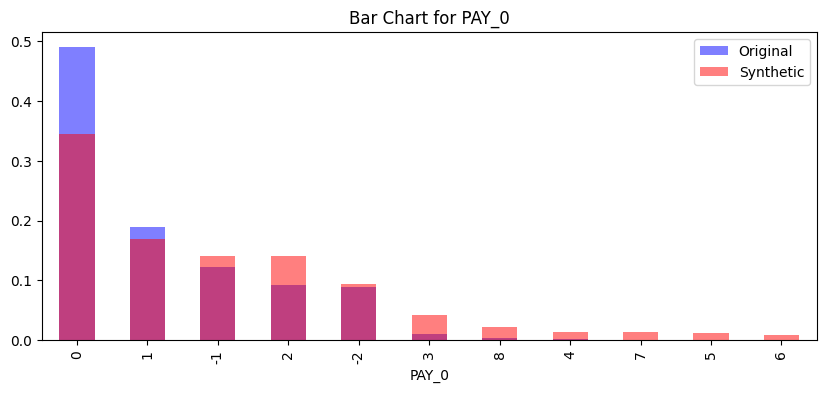

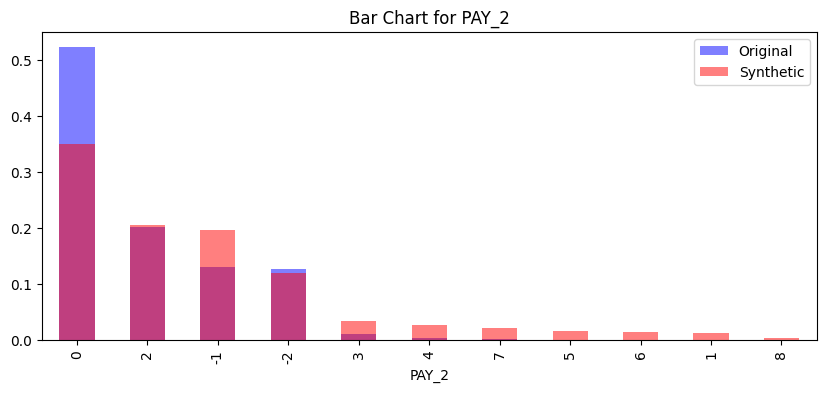

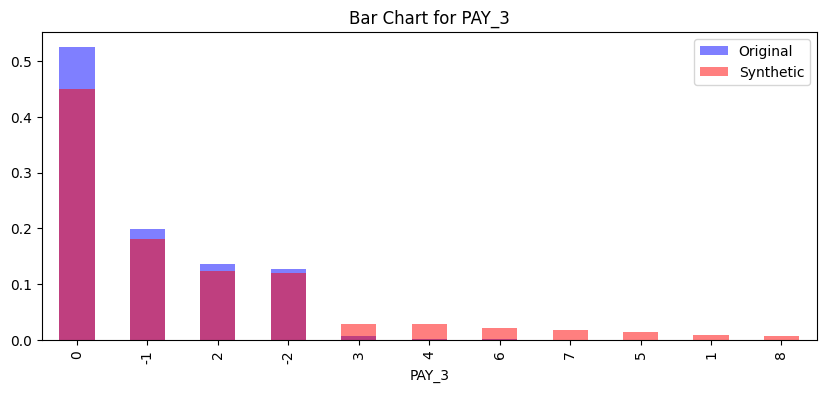

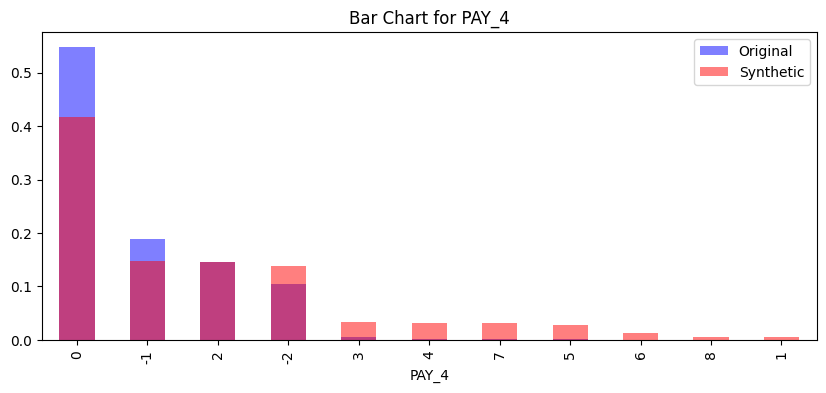

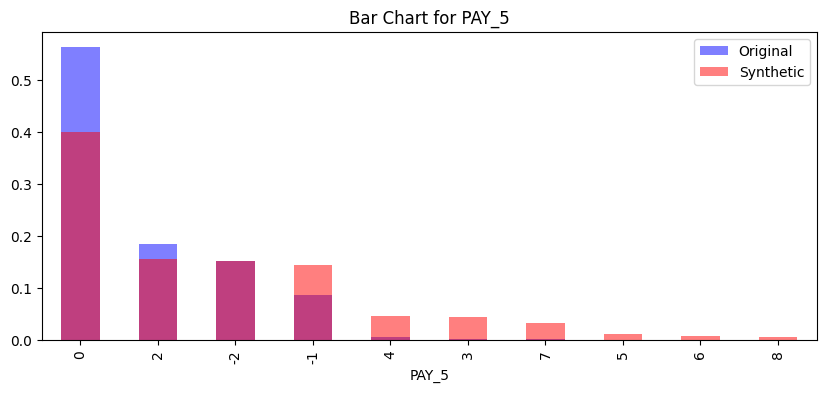

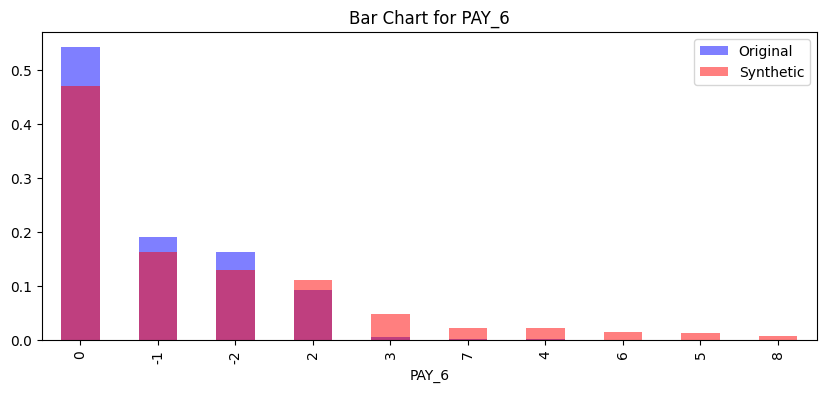

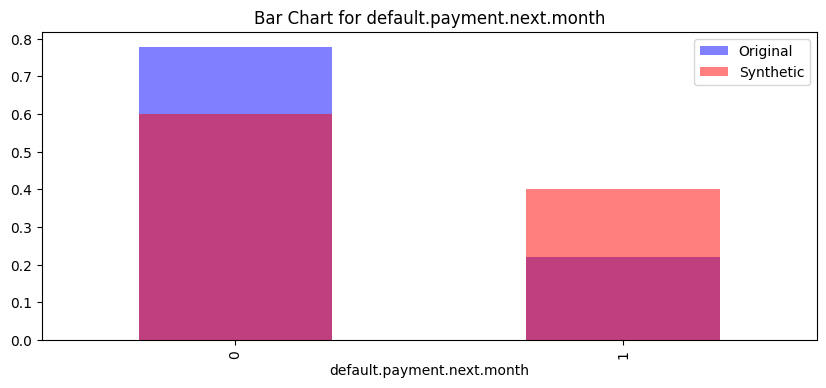

In [30]:
# Plotting histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], color="blue", label='Original', kde=True, stat="density", linewidth=0)
    sns.histplot(synth_full_data[col], color="red", label='Synthetic (CTGAN)', kde=True, stat="density", linewidth=0)
    plt.title(f'Histogram for {col}')
    plt.legend()
    plt.show()

# Plotting bar charts for categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.5, label='Original')
    synth_full_data[col].value_counts(normalize=True).plot(kind='bar', color='red', alpha=0.5, label='Synthetic')
    plt.title(f'Bar Chart for {col}')
    plt.legend()
    plt.show()

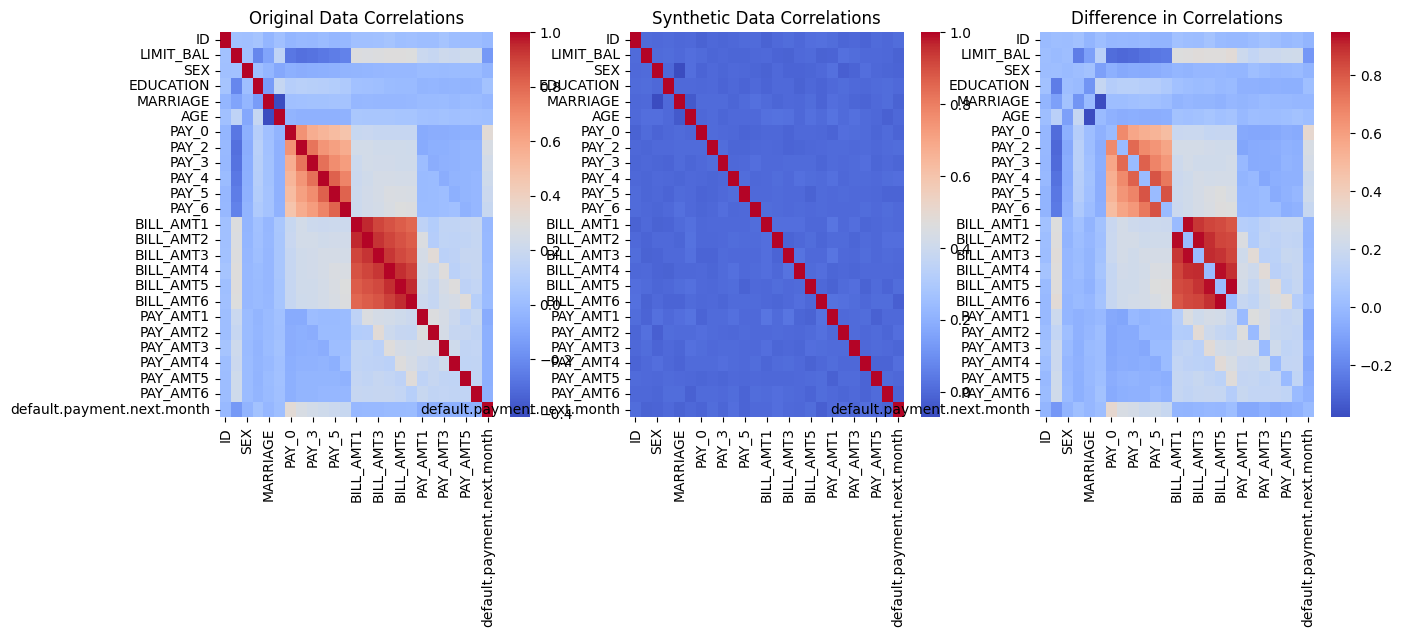

In [33]:
# Calculate correlation matrices
corr_original = df.corr()
corr_synthetic = synth_full_data.corr()

# Create a difference matrix
corr_diff = corr_original - corr_synthetic

# Plot the correlation matrices for visual comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(corr_original, annot=False, cmap='coolwarm')
plt.title('Original Data Correlations')

plt.subplot(1, 3, 2)
sns.heatmap(corr_synthetic, annot=False, cmap='coolwarm')
plt.title('Synthetic Data Correlations')

plt.subplot(1, 3, 3)
sns.heatmap(corr_diff, annot=False, cmap='coolwarm')
plt.title('Difference in Correlations')

plt.show()

In [39]:
ks_results = {}

for col in num_cols:
    # Perform the KS test for each numerical column
    ks_stat, p_value = ks_2samp(df[col], synth_full_data[col])
    ks_results[col] = {'KS Statistic': ks_stat, 'p-value': p_value}

# Convert results to a DataFrame for easier viewing
ks_results_df = pd.DataFrame(ks_results).T

print(ks_results_df)

           KS Statistic        p-value
ID             0.067333   1.421957e-59
LIMIT_BAL      0.439000   0.000000e+00
AGE            0.083033   2.053002e-90
BILL_AMT1      0.083433   2.767279e-91
BILL_AMT2      0.137067  2.859069e-246
BILL_AMT3      0.203567   0.000000e+00
BILL_AMT4      0.183267   0.000000e+00
BILL_AMT5      0.161933   0.000000e+00
BILL_AMT6      0.176067   0.000000e+00
PAY_AMT1       0.316933   0.000000e+00
PAY_AMT2       0.238933   0.000000e+00
PAY_AMT3       0.186167   0.000000e+00
PAY_AMT4       0.211167   0.000000e+00
PAY_AMT5       0.214333   0.000000e+00
PAY_AMT6       0.434200   0.000000e+00


In [40]:
ks_results_df["KS Statistic"].mean()

0.20909555555555556